In [1]:

import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [2]:


# For demonstration, assume that our data files are stored as CSV files.
# Adjust the file names and paths as appropriate.
data_dir = "."  # Change this if your files are in a different folder

# Define file paths
file_X = os.path.join(data_dir, "matrixXNirSpectrumData.csv")
file_X_axis = os.path.join(data_dir, "matrixXNirSpectrumDataAxis.csv")
file_deriv = os.path.join(data_dir, "matrixXNirSpectrumDerivative.csv")
file_deriv_axis = os.path.join(data_dir, "matrixXNirSpectrumDerivativeAxis.csv")
file_y = os.path.join(data_dir, "matrixYNirPropertyDensityNormalized.csv")

# Load the data using pandas (or numpy, as appropriate)
try:
    X = np.loadtxt(file_X, delimiter = ',').T  # shape: (2634, 208)
    X_axis = np.loadtxt(file_X_axis, delimiter = ',').T  # shape: (2634, 1)
    X_deriv = np.loadtxt(file_deriv, delimiter = ',').T  # shape: (2593, 208)
    X_deriv_axis = np.loadtxt(file_deriv_axis, delimiter = ',').T  # shape: (2593, 1)
    y = np.loadtxt(file_y, delimiter = ',').T  # shape: (0, 208) expected!
except Exception as e:
    print("Error while loading data files:", e)

# Print shapes for verification
print("Raw NIR Spectrum Data shape:", X.shape)
print("Raw Spectrum Axis shape:", X_axis.shape)
print("Derivative Spectrum Data shape:", X_deriv.shape)
print("Derivative Spectrum Axis shape:", X_deriv_axis.shape)
print("Response (Normalized Property Density) shape:", y.shape)


Raw NIR Spectrum Data shape: (208, 2635)
Raw Spectrum Axis shape: (2635,)
Derivative Spectrum Data shape: (208, 2594)
Derivative Spectrum Axis shape: (2594,)
Response (Normalized Property Density) shape: (208,)


## Data Inspection and Visualization

Let's inspect one sample from the raw spectrum and its derivative. In many spectral applications, the x-axis represents wavelengths.

<Axes: >

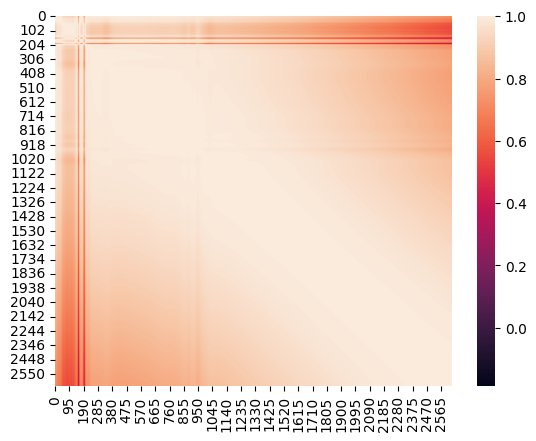

In [15]:
Z = np.concat((X,y[:,None]),axis=1)
c = np.corrcoef(Z.T)
sns.heatmap(c)

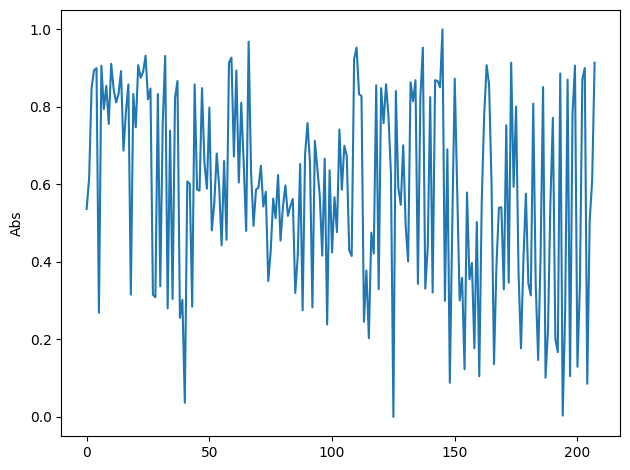

In [ ]:
plt.plot(y)
plt.ylabel("Abs")
plt.tight_layout()
plt.show()

In [19]:
np.isnan(y).sum(), np.isnan(X).sum()


(np.int64(0), np.int64(0))

## Applying PLS Regression???

The dual-sPLS method is designed to perform regression when you have many predictors (e.g., 208 wavelength channels).  
Our Python implementation of dual-sPLS is available as a package (with modules such as `dual_spls.lasso`, `dual_spls.pls`, etc.).   ????????


In [6]:
# Import the dual-sPLS LASSO function from your package
# (Make sure the package is installed/available in your PYTHONPATH)
from dual_spls.pls import d_spls_pls

# Set model parameters
ncp = 10   # number of components


model = d_spls_pls(X, y, ncp=ncp, verbose=True)

# Display some model attributes
print("Model type:", model.get('type', 'unknown'))
print("Intercepts:", model['intercept'])
print("Shape of coefficient matrix (Bhat):", model['Bhat'].shape)



PLS ic=1 mu=459.9024
PLS ic=2 mu=49.4990
PLS ic=3 mu=12.3965
PLS ic=4 mu=1.2408
PLS ic=5 mu=0.3761
PLS ic=6 mu=0.1513
PLS ic=7 mu=0.1034
PLS ic=8 mu=0.0695
PLS ic=9 mu=0.0189
PLS ic=10 mu=0.0166
Model type: pls
Intercepts: [0.45430802 0.6449452  2.92609102 2.29467362 3.59486131 4.30131171
 4.52852854 3.93449909 3.97516609 2.97835904]
Shape of coefficient matrix (Bhat): (2635, 10)


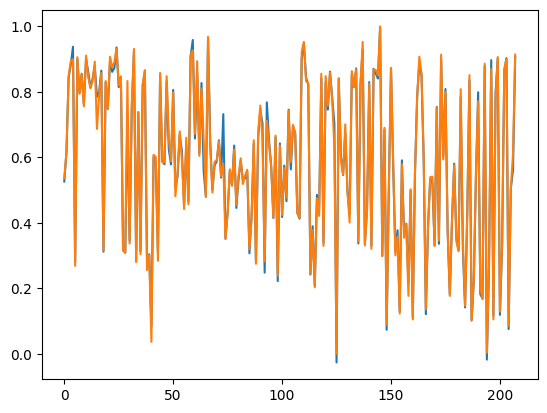

In [7]:
from dual_spls.plot import d_spls_plot

y_fitted = model['fitted_values'][:,-1]

plt.plot(y_fitted)
plt.plot(y)
plt.show()




In [5]:
# Import the dual-sPLS LASSO function from your package
# (Make sure the package is installed/available in your PYTHONPATH)
from dual_spls.lasso import d_spls_lasso

# Set model parameters
ncp = 5   # number of components
ppnu = 0.7


model_lasso = d_spls_lasso(X, y, ncp=ncp, ppnu=ppnu, verbose=True)

# Display some model attributes
print("Model type:", model.get('type', 'unknown'))
print("Intercepts:", model['intercept'])
print("Shape of coefficient matrix (Bhat):", model['Bhat'].shape)

Dual PLS ic=1, lambda=0.0639, mu=149.8045, nu=9.5707, nbzeros=1844
Dual PLS ic=2, lambda=0.0982, mu=9.9543, nu=0.9779, nbzeros=1053
Dual PLS ic=3, lambda=0.1573, mu=3.9094, nu=0.6151, nbzeros=423
Dual PLS ic=4, lambda=0.1939, mu=0.2300, nu=0.0446, nbzeros=46
Dual PLS ic=5, lambda=0.0209, mu=0.2863, nu=0.0060, nbzeros=4
Model type: pls
Intercepts: [ 0.45430802  0.6449452   2.92609102  2.29467362  3.59486131  4.30131171
  4.52852854  3.93449909  3.97516609  2.97835904  2.84097238  2.37422249
  1.87897292  2.19505796  2.0037171   1.86069098  1.54298482  0.36577879
 -1.5218289  -2.02461979 -2.28705098 -2.09988992 -2.22999539 -2.97613147
 -3.40018327 -3.49324872 -3.7381015  -4.61847211 -4.50474624 -4.43973396
 -3.06591098 -2.12636724 -2.15275096 -2.31509845 -2.64333671 -2.93577348
 -3.57377172 -3.75498337 -2.90859938 -3.0762433  -3.4047548  -3.71305973
 -3.94460401 -3.04475381 -2.37813372 -2.73711702 -2.90205574 -3.34282463
 -3.57271767 -3.48453343]
Shape of coefficient matrix (Bhat): (2635

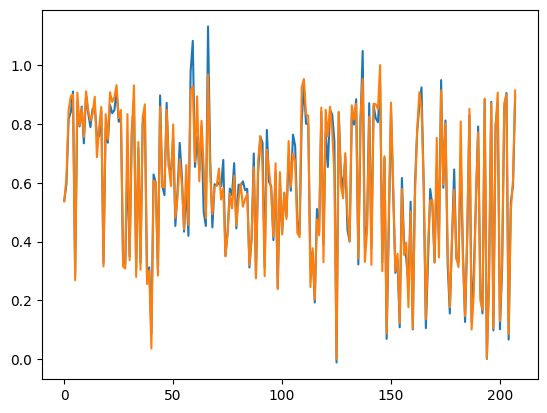

In [44]:
from dual_spls.plot import d_spls_plot

y_fitted = model_lasso['fitted_values'].T
y_fitted = y_fitted[-1]

plt.plot(y_fitted)
plt.plot(y)
plt.show()

In [4]:
from dual_spls.calval import d_spls_calval

ind = d_spls_calval(X, pcal=70, y=y,method="pca_euclidean", pc=0.9)
X_cal = X[ind['indcal'],:]
X_val = X[ind['indval'],:]
y_cal = y[ind['indcal']]
y_val = y[ind['indval']]
print(y_cal.shape)


(145,)


In [ ]:
# Import the dual-sPLS LASSO function from your package
# (Make sure the package is installed/available in your PYTHONPATH)
from dual_spls.pls import d_spls_pls

# Set model parameters
ncp = 10   # number of components


model = d_spls_pls(X, y, ncp=ncp, verbose=True)

# Display some model attributes
print("Model type:", model.get('type', 'unknown'))
print("Intercepts:", model['intercept'])
print("Shape of coefficient matrix (Bhat):", model['Bhat'].shape)

In [42]:
# Import the dual-sPLS LASSO function from your package
# (Make sure the package is installed/available in your PYTHONPATH)
from dual_spls.lasso import d_spls_lasso

# Set model parameters
ncp = 3   # number of components
ppnu = 0.9


model_lasso = d_spls_lasso(X_cal, y_cal, ncp=ncp, ppnu=ppnu, verbose=True)

# Display some model attributes
print("Model type:", model_lasso.get('type', 'unknown'))
print("Intercepts:", model_lasso['intercept'])
print("Shape of coefficient matrix (Bhat):", model_lasso['Bhat'].shape)


Dual PLS ic=1, lambda=0.4207, mu=29.5362, nu=12.4264, nbzeros=2372
Dual PLS ic=2, lambda=0.1287, mu=5.2141, nu=0.6709, nbzeros=2109
Dual PLS ic=3, lambda=0.3166, mu=1.8723, nu=0.5928, nbzeros=1846
Model type: lasso
Intercepts: [0.44925624 1.12275455 2.90901598]
Shape of coefficient matrix (Bhat): (2635, 3)


In [44]:
model_lasso['zerovar']

array([2372, 2109, 1846])

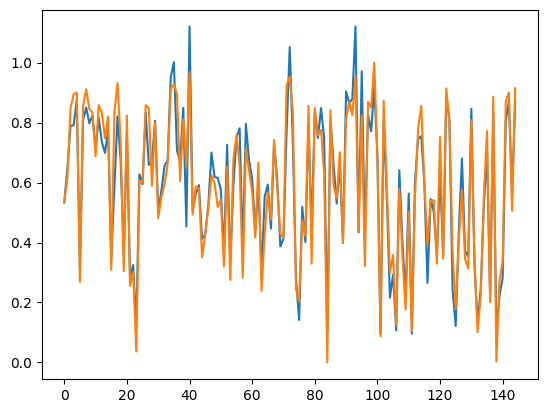

In [45]:
y_fitted = model_lasso['fitted_values'].T
y_fitted = y_fitted[-1]

plt.plot(y_fitted)
plt.plot(y_cal)
plt.show()

(63,)


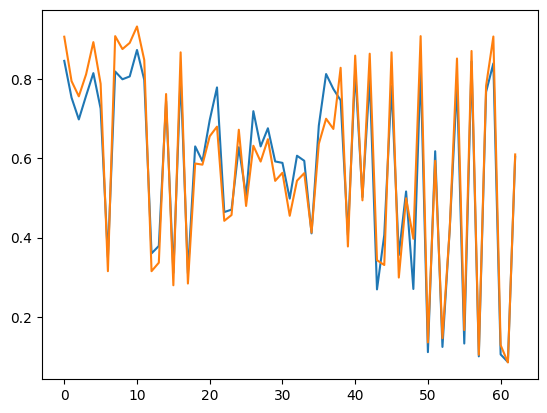

In [46]:
from dual_spls.predict import d_spls_predict
y_new = d_spls_predict(model_lasso, X_val).T[-1]
print(y_new.shape)
plt.plot(y_new)
plt.plot(y_val)
plt.show()

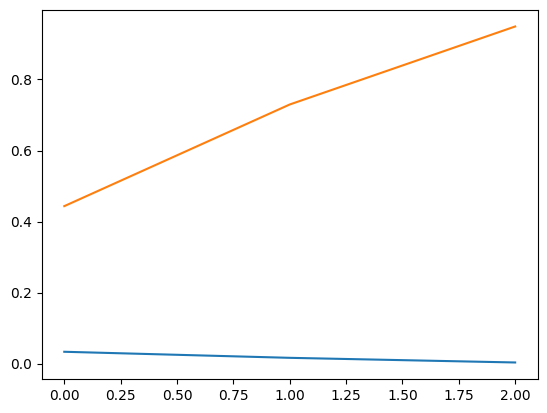

In [47]:
from dual_spls.metric import d_spls_metric

metrics=d_spls_metric(model_lasso,X_val,y_val)
plt.plot(metrics['MSE'])
plt.plot(metrics['R2'])
plt.show()

In [5]:
# Import the dual-sPLS LASSO function from your package
# (Make sure the package is installed/available in your PYTHONPATH)
from dual_spls.ridge import d_spls_ridge

# Set model parameters
ncp = 10   # number of components
ppnu = 0.7


model_ridge = d_spls_ridge(X_cal, y_cal, ncp=ncp, ppnu=ppnu, verbose=True)

# Display some model attributes
print("Model type:", model_ridge.get('type', 'unknown'))
print("Intercepts:", model_ridge['intercept'])
print("Shape of coefficient matrix (Bhat):", model_ridge['Bhat'].shape)

Ridge: Component 1 computed.
Ridge: Component 2 computed.
Ridge: Component 3 computed.
Ridge: Component 4 computed.
Ridge: Component 5 computed.
Ridge: Component 6 computed.
Ridge: Component 7 computed.
Ridge: Component 8 computed.
Ridge: Component 9 computed.
Ridge: Component 10 computed.
Model type: ridge
Intercepts: [0.58772568 1.03119617 2.57076166 2.57076166 2.57076166 2.57076166
 2.57076166 2.57076166 2.57076166 2.57076166]
Shape of coefficient matrix (Bhat): (2635, 10)


In [6]:
model_ridge['zerovar']

array([2635, 1799, 1799, 1799, 1799, 1799, 1799, 1799, 1799, 1799])

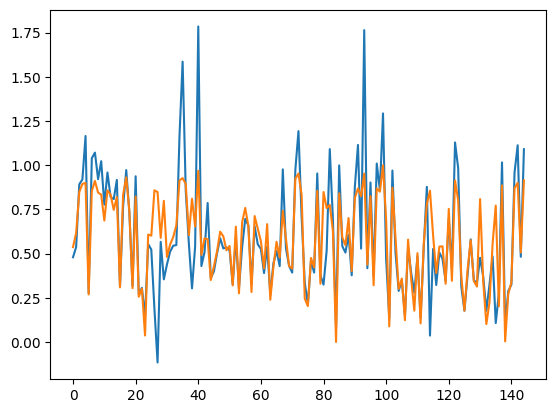

In [7]:
y_fitted = model_ridge['fitted_values'].T
y_fitted = y_fitted[-1]

plt.plot(y_fitted)
plt.plot(y_cal)
plt.show()

(63,)


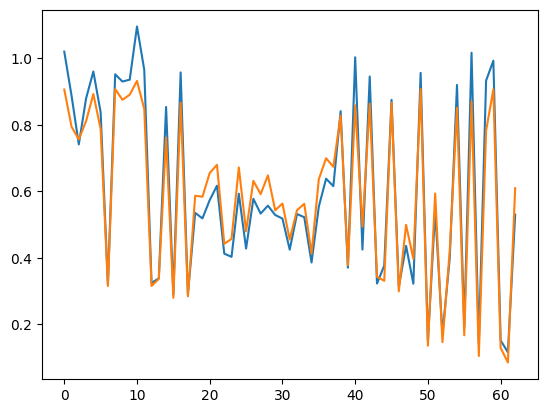

In [100]:
from dual_spls.predict import d_spls_predict
y_new = d_spls_predict(model_ridge, X_val).T[-1]
print(y_new.shape)
plt.plot(y_new)
plt.plot(y_val)
plt.show()

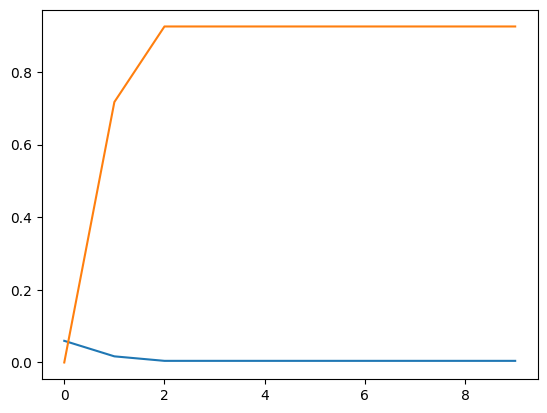

In [101]:
from dual_spls.metric import d_spls_metric

metrics=d_spls_metric(model_ridge,X_val,y_val)
plt.plot(metrics['MSE'])
plt.plot(metrics['R2'])
plt.show()

In [15]:
print(X_cal.shape[1])

2635


In [24]:
# Import the dual-sPLS LASSO function from your package
# (Make sure the package is installed/available in your PYTHONPATH)
from dual_spls.GL import d_spls_GL,cluster_variables_fixed_groups

# Set model parameters
ncp = 5   # number of components
ppnu = 0.9
indG = cluster_variables_fixed_groups(X_cal, method='ward', n_groups=5)

model_GL = d_spls_GL(X_cal, y_cal, ncp=ncp, ppnu=ppnu,indG=indG ,verbose=True)

# Display some model attributes
print("Model type:", model_GL.get('type', 'unknown'))
print("Intercepts:", model_GL['intercept'])
print("Shape of coefficient matrix (Bhat):", model_GL['Bhat'].shape)
print(len(indG))

Dual PLS ic = 1 | lambda = [7.55495338 4.30983439 3.40775424 4.20878692 2.74643944] | mu = 7.49499074437704 | nu = [15.10319511 10.46219022  1.22672909  6.10897705  3.45200021] | nbzeros = [353 640 144 625 834]
Dual PLS ic = 2 | lambda = [ 1.77505159  7.47369187  1.94170115 22.73351624  0.58632709] | mu = 2.1301501737343944 | nu = [0.36667117 0.62080068 1.36703464 0.63249382 0.65003406] | nbzeros = [353 640 130 625 834]
Dual PLS ic = 3 | lambda = [4.92686274 4.70568192 3.02217443 1.5245379  1.28200255] | mu = 1.5626950307341776 | nu = [0.3022403  0.65438074 0.44726766 0.87052959 0.82468711] | nbzeros = [353 640 130 625 751]
Dual PLS ic = 4 | lambda = [14.73646021 25.90305926  2.92028501  7.62161053  0.65902153] | mu = 0.1048583899917069 | nu = [0.06146349 0.07791595 0.04281296 0.07162688 0.04851793] | nbzeros = [314 640 116 625 751]
Dual PLS ic = 5 | lambda = [ 0.32068742  1.00860531  2.56657641 36.15627051  0.82145565] | mu = 0.040933117735710886 | nu = [0.00203346 0.00690478 0.028398

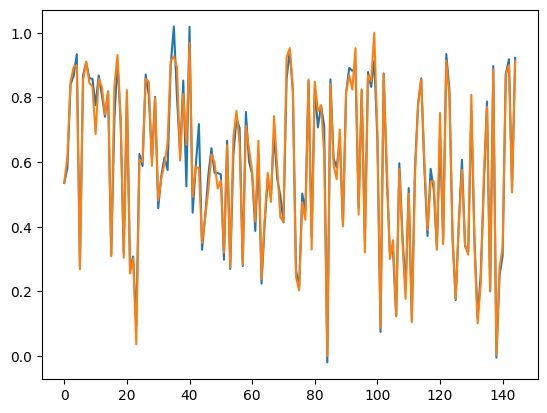

In [25]:
y_fitted = model_GL['fitted_values'].T
y_fitted = y_fitted[-1]

plt.plot(y_fitted)
plt.plot(y_cal)
plt.show()

(63,)


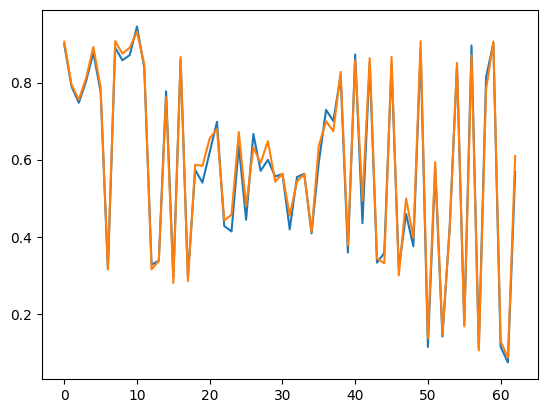

In [26]:
from dual_spls.predict import d_spls_predict
y_new = d_spls_predict(model_GL, X_val).T[-1]
print(y_new.shape)
plt.plot(y_new)
plt.plot(y_val)
plt.show()

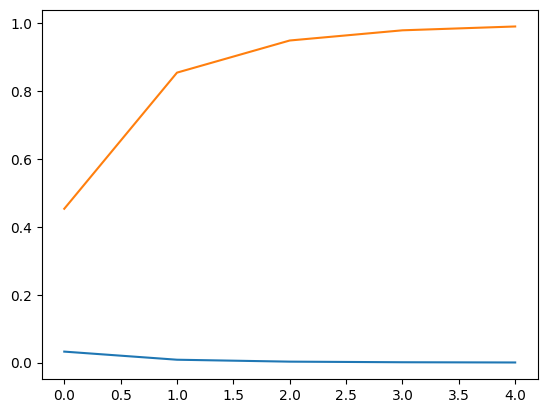

In [27]:
from dual_spls.metric import d_spls_metric

metrics=d_spls_metric(model_GL,X_val,y_val)
plt.plot(metrics['MSE'])
plt.plot(metrics['R2'])
plt.show()

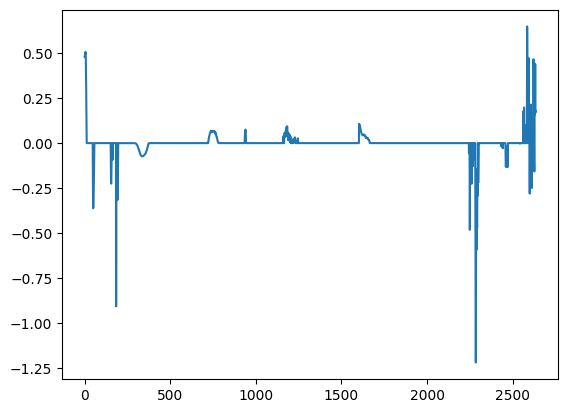

0.1616698292220114


In [28]:
B = model_GL['Bhat']
sprsty = B.T[-1]
ratio_sprs = np.count_nonzero(sprsty)/len(sprsty)
plt.plot(sprsty)
plt.show()
print(ratio_sprs)

## Applying Dual-sPLS Regression

The dual-sPLS method is designed to perform regression when you have many predictors (e.g., 208 wavelength channels).  
Our Python implementation of dual-sPLS is available as a package (with modules such as `dual_spls.lasso`, `dual_spls.pls`, etc.).  



### Running Dual-sPLS

For this demonstration we will use one of the implemented dual-sPLS methods, for example the LASSO version.  
Make sure your dual-sPLS modules are in your Python path (for example in a package called `dual_spls`).

Below, we run the dual-sPLS LASSO method. You may adjust the parameters (`ncp` for number of components, `ppnu` as a sparsity parameter, etc.) as needed.


In [41]:
X.shape, X_axis.shape

((2635, 208), (2635, 1))

Dual PLS ic=1, lambda=0.3944, mu=39.2365, nu=15.4736, nbzeros=2372
Dual PLS ic=2, lambda=0.1282, mu=8.1344, nu=1.0426, nbzeros=2109
Dual PLS ic=3, lambda=0.3348, mu=2.4466, nu=0.8192, nbzeros=1846
Dual PLS ic=4, lambda=5.9778, mu=0.0120, nu=0.0720, nbzeros=1583
Dual PLS ic=5, lambda=0.0646, mu=0.2159, nu=0.0139, nbzeros=1435
Model type: lasso
Intercepts: [0.4541927  1.32322935 2.86496942 1.93659181 1.74787738]
Shape of coefficient matrix (Bhat): (2635, 5)


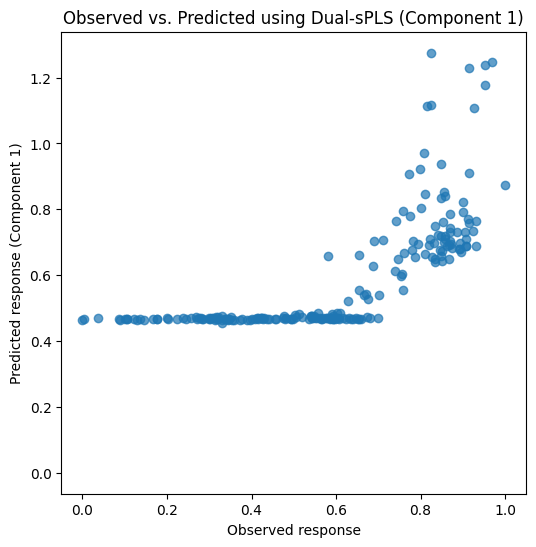

In [66]:
# Import the prediction function
from dual_spls.predict import d_spls_predict

y_pred = d_spls_predict(model, X.T)

# For demonstration, plot observed vs predicted values for the first component
plt.figure(figsize=(6, 6))
plt.scatter(y, y_pred[:, 0], alpha=0.7)
plt.xlabel("Observed response")
plt.ylabel("Predicted response (Component 1)")
plt.title("Observed vs. Predicted using Dual-sPLS (Component 1)")
plt.plot([min(y), max(y)], [min(y), max(y)], 'r--')
plt.show()
